In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/User/Downloads/polynomial-regression.csv")
df

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200
5,150,220
6,200,240
7,250,240
8,300,300
9,400,350


In [4]:
df.describe()

,araba_fiyat,araba_max_hiz
count,15.000000,15.000000
mean,598.666667,274.333333
std,838.824574,77.364321
min,60.000000,180.000000
25%,110.000000,200.000000
50%,250.000000,240.000000
75%,625.000000,355.000000
max,3000.000000,365.000000


In [5]:
from sklearn.model_selection import train_test_split
X=df.iloc[:, :-1].values
Y=df.iloc[:,1].values

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

print(reg.coef_)
print(reg.intercept_)

[0.06082599]
240.28778787167712


<AxesSubplot:xlabel='araba_fiyat'>

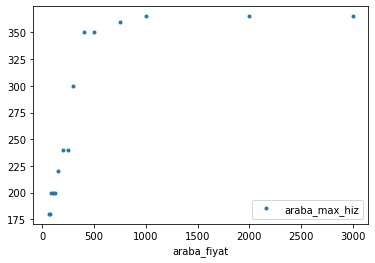

In [6]:
df.plot(x="araba_fiyat",y="araba_max_hiz",style=".")

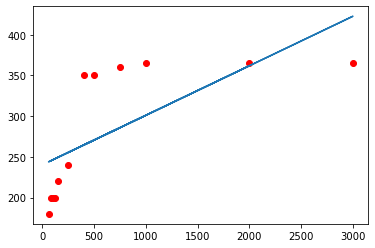

In [7]:
plt.scatter(X_train,Y_train, color="red")
plt.plot(X_train, reg.predict(X_train))

In [8]:
from sklearn.preprocessing import PolynomialFeatures
preg=PolynomialFeatures(degree=2)
x_poly=preg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly,Y_train)

LinearRegression()

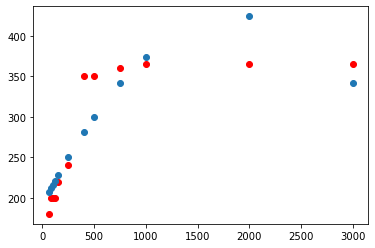

In [9]:
plt.scatter(X_train,Y_train, color="red")
plt.scatter(X_train, lin_reg_2.predict(preg.fit_transform(X_train)))
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
pregA=PolynomialFeatures(degree=3)
x_poly=pregA.fit_transform(X_train)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(x_poly,Y_train)

LinearRegression()

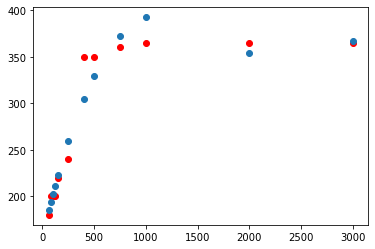

In [11]:
plt.scatter(X_train,Y_train, color="red")
plt.scatter(X_train, lin_reg_3.predict(pregA.fit_transform(X_train)))
plt.show()

In [12]:
#applying for whole dataset
guess2=lin_reg_3.predict(pregA.fit_transform(X))
guess1=lin_reg_2.predict(preg.fit_transform(X))
df['Guess1']=guess1
df['Guess2']=guess2
df

,araba_fiyat,araba_max_hiz,Guess1,Guess2
0,60,180,206.753967,185.114949
1,70,180,209.152623,189.532544
2,80,200,211.538029,193.892642
3,100,200,216.269099,202.441644
4,120,200,220.947176,210.764549
5,150,220,227.864931,222.830652
6,200,240,239.129561,241.847100
7,250,240,250.062987,259.531530
8,300,300,260.665211,275.924484
9,400,350,280.876051,304.998137


In [15]:
#viewing only the testsets
ff=pd.DataFrame({'Actual':Y_test,'Predicted_linear':reg.predict(X_test),
                 'Predicted_deg2':lin_reg_2.predict(preg.fit_transform(X_test)),
                'Predicted _deg3':lin_reg_3.predict(pregA.fit_transform(X_test))})
ff

,Actual,Predicted_linear,Predicted_deg2,Predicted _deg3
0,180,244.545607,209.152623,189.532544
1,240,252.452985,239.129561,241.847100
2,300,258.535584,260.665211,275.924484
